In [27]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [29]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [30]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [31]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [32]:
tf.keras.backend.clear_session()

In [33]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 203
window_size = 36
train_split = split_index + 1 - 12

In [34]:
data = pd.read_csv('2003_mo_model_input_PE.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - Consumo de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,99.743,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,86.997,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,83.033,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,82.302,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,80.217,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


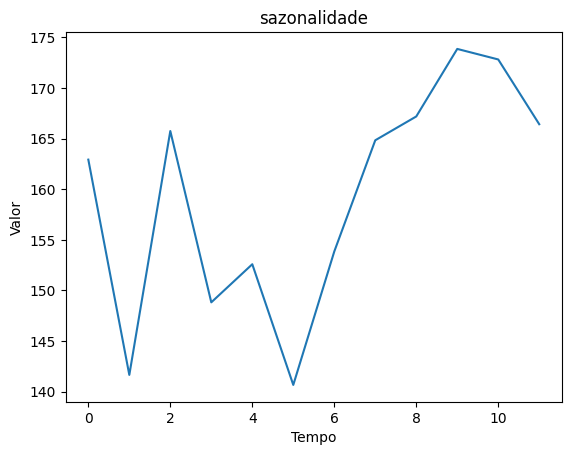

,sazonalidade
sazonalidade,
0,162.917688
1,141.664771
2,165.742707
3,148.829885
4,152.591538
5,140.677688
6,153.848447
7,164.828600
8,167.178395


In [35]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [36]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509,162.917688,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971,141.664771,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434,165.742707,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896,148.829885,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358,152.591538,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.591538,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.677688,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.848447,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.828600,NaN


In [37]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
244        NaN
245        NaN
246        NaN
247        NaN
248        NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 249, dtype: float64

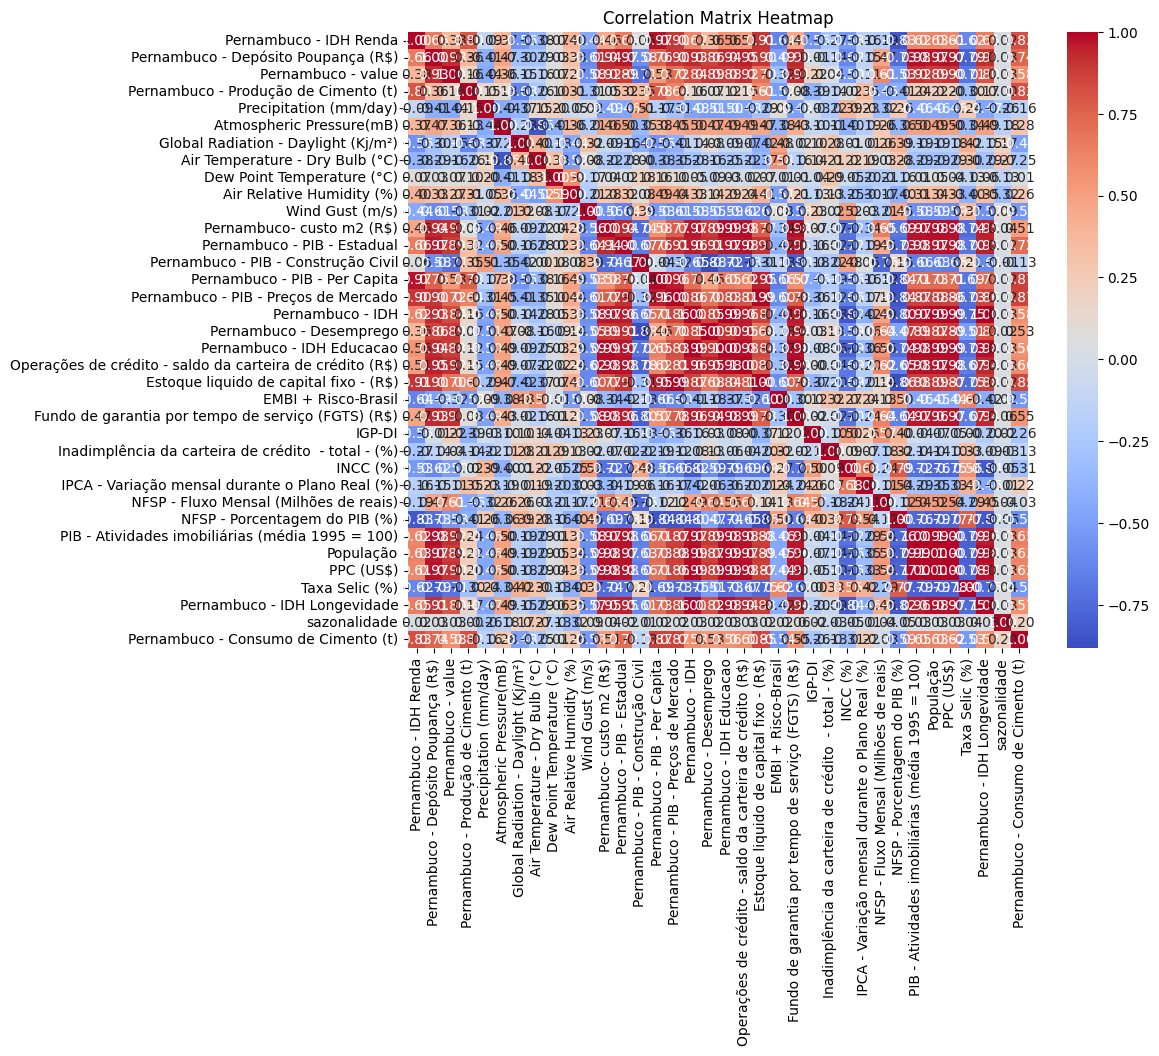

In [38]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [40]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,Pernambuco - IDH Renda,1.144071e+09
1,Pernambuco - Depósito Poupança (R$),8.754481e+04
2,Pernambuco - value,1.964101e+05
3,Pernambuco - Produção de Cimento (t),3.499106e+04
4,Precipitation (mm/day),1.100883e+02
5,Atmospheric Pressure(mB),2.188675e+07
6,Global Radiation - Daylight (Kj/m²),6.974292e+02
7,Air Temperature - Dry Bulb (°C),4.736674e+04
8,Dew Point Temperature (°C),2.652434e+04
9,Air Relative Humidity (%),1.134337e+04


In [41]:
data =data.drop(['Precipitation (mm/day)', 
                 'Dew Point Temperature (°C)', 
                 ' NFSP - Fluxo Mensal (Milhões de reais)',
                 'PPC (US$)',
                 'População'], axis=1)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,1012.239458,1768.569550,25.820814,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,11.520143,126.459809,1.611498,0.765509,162.917688,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,1012.240419,1767.661814,25.820777,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,11.189862,126.581813,1.450389,0.765971,141.664771,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,1012.240980,1767.132301,25.820756,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,10.820792,126.703818,1.870184,0.766434,165.742707,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,1012.241040,1767.075567,25.820754,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,10.417840,126.825822,1.355287,0.766896,148.829885,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,1012.120648,1783.069193,25.939427,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,9.959690,126.976217,1.585538,0.767358,152.591538,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.591538,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.677688,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.848447,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.828600,NaN


In [42]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-2.807207,-1.653058,-1.043635,-1.094801,-0.211797,0.516279,-0.186508,-0.557582,0.847535,-1.613083,-1.821402,-0.106539,-2.555897,-2.397377,-2.149088,-0.925837,-1.855398,-1.405679,-2.469876,-0.581961,-1.384242,2.574314,1.320402,3.184489,2.782450,4.506880,-1.894583,2.125141,-2.295448,0.332881
1,-2.742838,-1.644612,-1.000486,-1.101162,-0.210969,0.512379,-0.186552,-0.553870,0.847535,-1.592276,-1.801761,-0.074148,-2.505549,-2.355430,-2.116316,-0.927872,-1.834070,-1.405133,-2.431875,-0.804750,-1.415865,2.334870,1.314693,3.029073,2.407943,4.328460,-1.889555,1.610904,-2.256560,-1.611309
2,-2.678468,-1.636166,-0.959081,-1.088059,-0.210486,0.510103,-0.186578,-0.551705,0.847535,-1.572499,-1.782119,-0.041756,-2.455200,-2.313484,-2.083544,-0.929907,-1.812743,-1.405096,-2.393874,-0.619149,-1.428073,2.221334,1.313266,2.926505,2.179073,4.129086,-1.884527,2.950828,-2.217672,0.591311
3,-2.614099,-1.627719,-0.919119,-1.080696,-0.210434,0.509860,-0.186580,-0.551473,0.847535,-1.553450,-1.762477,-0.009364,-2.404851,-2.271538,-2.050772,-0.931943,-1.791415,-1.404678,-2.355872,-0.126522,-1.431053,2.040542,1.311046,2.828220,2.077086,3.911409,-1.879499,1.307354,-2.178784,-0.955853
4,-2.549729,-1.619273,-0.900690,-1.066404,-0.314123,0.578587,-0.044159,-0.627212,0.867482,-1.535471,-1.742835,0.023027,-2.354503,-2.229591,-2.017999,-0.933978,-1.770087,-1.403356,-2.317871,0.525280,-1.424070,1.912744,1.300019,3.036493,1.942128,3.663912,-1.873302,2.042281,-2.139896,-0.611742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-0.600322,1.403448,1.800545,-1.203194,1.259565,-1.036721,-0.780303,0.292979,0.326772,1.814059,0.764379,-1.125123,-0.398736,0.056878,1.096631,1.094543,1.260822,1.360064,0.117681,-0.334258,1.332879,3.148408,-0.736097,0.370628,-0.689886,-0.724085,1.428371,-1.370268,1.010326,0.507689
200,-0.614065,1.461826,1.854413,-1.205536,0.657967,-0.765469,-0.196659,-0.198260,0.899738,1.859125,0.742787,-1.106064,-0.431617,0.027516,1.082692,1.094010,1.255488,1.384545,0.092456,-0.327663,1.326386,3.219670,-0.746418,0.427775,-0.441954,-0.736434,1.436331,-1.390925,0.994468,0.722645
201,-0.627809,1.520205,1.917551,-1.201854,0.118864,-0.453809,0.434426,-0.594394,1.240165,1.905792,0.721196,-1.087006,-0.464499,-0.001847,1.068753,1.093476,1.250154,1.413764,0.067231,-0.303635,1.514665,3.421082,-0.828457,0.538287,-0.132782,-0.738433,1.444292,-1.527663,0.978610,1.332618
202,-0.641553,1.578583,1.981281,-1.202296,-0.294240,-0.154751,1.025923,-0.774662,1.559222,1.954823,0.699604,-1.067947,-0.497380,-0.031210,1.054813,1.092942,1.244820,1.440408,0.042006,-0.275803,1.747673,3.373840,-0.866800,0.666156,0.084061,-0.738236,1.456774,-1.609340,0.962752,1.237455


In [43]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-2.807207,-1.653058,-1.043635,-1.094801,-0.211797,0.516279,-0.186508,-0.557582,0.847535,-1.613083,-1.821402,-0.106539,-2.555897,-2.397377,-2.149088,-0.925837,-1.855398,-1.405679,-2.469876,-0.581961,-1.384242,2.574314,1.320402,3.184489,2.782450,4.506880,-1.894583,2.125141,-2.295448,0.332881
1,-2.742838,-1.644612,-1.000486,-1.101162,-0.210969,0.512379,-0.186552,-0.553870,0.847535,-1.592276,-1.801761,-0.074148,-2.505549,-2.355430,-2.116316,-0.927872,-1.834070,-1.405133,-2.431875,-0.804750,-1.415865,2.334870,1.314693,3.029073,2.407943,4.328460,-1.889555,1.610904,-2.256560,-1.611309
2,-2.678468,-1.636166,-0.959081,-1.088059,-0.210486,0.510103,-0.186578,-0.551705,0.847535,-1.572499,-1.782119,-0.041756,-2.455200,-2.313484,-2.083544,-0.929907,-1.812743,-1.405096,-2.393874,-0.619149,-1.428073,2.221334,1.313266,2.926505,2.179073,4.129086,-1.884527,2.950828,-2.217672,0.591311
3,-2.614099,-1.627719,-0.919119,-1.080696,-0.210434,0.509860,-0.186580,-0.551473,0.847535,-1.553450,-1.762477,-0.009364,-2.404851,-2.271538,-2.050772,-0.931943,-1.791415,-1.404678,-2.355872,-0.126522,-1.431053,2.040542,1.311046,2.828220,2.077086,3.911409,-1.879499,1.307354,-2.178784,-0.955853
4,-2.549729,-1.619273,-0.900690,-1.066404,-0.314123,0.578587,-0.044159,-0.627212,0.867482,-1.535471,-1.742835,0.023027,-2.354503,-2.229591,-2.017999,-0.933978,-1.770087,-1.403356,-2.317871,0.525280,-1.424070,1.912744,1.300019,3.036493,1.942128,3.663912,-1.873302,2.042281,-2.139896,-0.611742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-0.410394,0.961566,1.473343,-1.186133,1.121116,1.007158,-0.791244,-0.004291,-0.592303,1.446657,0.977057,-1.325730,-0.050278,0.360381,1.240559,1.104496,1.324225,1.193119,0.391058,-0.234432,1.098595,0.237913,-0.637894,-1.790206,-1.972576,-0.537386,1.267871,-1.152820,1.179408,0.507689
188,-0.429138,0.968213,1.548238,-1.176138,0.662364,0.950265,-0.246201,-0.352111,-0.461541,1.462257,0.964750,-1.312292,-0.073935,0.340788,1.231289,1.103253,1.319012,1.206925,0.371698,-0.187714,1.076314,0.559735,-0.723145,-1.629944,-1.832285,-0.553461,1.288480,-1.253503,1.167792,0.722645
189,-0.447882,0.974859,1.558710,-1.172733,0.391527,0.863658,0.229988,-0.527596,-0.402989,1.481129,0.952443,-1.298853,-0.097593,0.321195,1.222018,1.102010,1.313798,1.227934,0.352338,-0.161779,1.263463,0.802696,-0.863773,-1.383366,-1.767518,-0.577640,1.309088,-1.425444,1.156177,1.332618
190,-0.466626,0.981506,1.585954,-1.175086,0.061384,0.806617,0.577362,-0.424384,-0.464020,1.503384,0.940135,-1.285414,-0.121250,0.301603,1.212748,1.100767,1.308585,1.246115,0.332977,-0.157728,1.498990,1.106124,-0.975183,-1.227161,-1.688436,-0.606406,1.322965,-1.237935,1.144562,1.237455


In [44]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
187    192.689
188    195.797
189    204.539
190    165.377
191    163.324
Name: Pernambuco - Consumo de Cimento (t), Length: 192, dtype: float64

In [45]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [46]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(156, 36, 30)

In [47]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
156,0.945655,0.526252,0.206629,-0.013596,-0.006883,0.702920,0.876410,-0.934742,-0.728074,0.910880,1.131246,-1.390834,0.486057,0.809158,1.308007,1.283994,1.233343,1.222613,0.845472,0.893819,1.318837,-0.878779,0.613775,-0.843949,0.077835,-0.555830,0.827975,0.407265,1.369466,0.332881
157,0.879204,0.545562,0.214614,-0.088132,0.123547,0.685506,0.704181,-0.677367,-0.803915,0.932888,1.132816,-1.396627,0.479176,0.803873,1.307173,1.276856,1.237406,1.211968,0.833972,1.005776,1.195627,-1.051645,0.807648,-0.905729,-0.168265,-0.572666,0.830073,0.137084,1.366961,-1.611309
158,0.812753,0.564873,0.233258,-0.158424,0.469338,0.706272,0.284794,-0.270220,-0.967447,0.950807,1.134387,-1.402421,0.472294,0.798587,1.306339,1.269717,1.241469,1.202030,0.822472,1.076752,1.159056,-1.098564,1.037275,-0.974248,-0.389950,-0.585674,0.832171,0.296087,1.364455,0.591311
159,0.746302,0.584183,0.257145,-0.229516,0.880549,0.733091,-0.297606,0.161137,-1.016647,0.968892,1.135957,-1.408214,0.465412,0.793302,1.305505,1.262579,1.245532,1.192181,0.810972,1.085553,1.111178,-1.062721,1.108728,-1.053570,-0.479719,-0.596842,0.834269,0.197300,1.361950,-0.955853
160,0.679851,0.603494,0.277152,-0.301402,1.473612,0.757088,-0.830510,0.429557,-1.020802,0.987880,1.137527,-1.414007,0.458531,0.788016,1.304672,1.255441,1.249595,1.183708,0.799472,1.062918,1.101433,-0.935050,1.109333,-1.130350,-0.570527,-0.605761,0.833606,0.469403,1.359445,-0.611742
161,0.613399,0.622805,0.313267,-0.365479,1.833175,0.819374,-1.050276,0.547279,-0.873607,1.007777,1.139097,-1.419801,0.451649,0.782731,1.303838,1.248303,1.253659,1.174004,0.787972,1.000960,1.094619,-0.911738,1.064134,-1.002475,-0.507950,-0.615263,0.832943,0.775434,1.356939,-1.701606
162,0.546948,0.642115,0.350851,-0.431524,1.748942,0.817486,-0.888632,0.476617,-0.607016,1.027657,1.140668,-1.425594,0.444768,0.777445,1.303004,1.241165,1.257722,1.166949,0.776472,0.914197,1.070145,-1.067437,1.167813,-1.242922,-0.557480,-0.618938,0.832280,0.136553,1.354434,-0.496761
163,0.480497,0.661426,0.402963,-0.495640,1.442410,0.813123,-0.447649,0.238536,-0.387555,1.047548,1.142238,-1.431387,0.437886,0.772160,1.302170,1.234027,1.261785,1.159632,0.764972,0.810555,1.060594,-0.970725,1.364965,-1.322806,-0.742853,-0.619453,0.840249,0.642038,1.351929,0.507689
164,0.414046,0.680736,0.457441,-0.552755,0.942116,0.823496,0.085203,0.074089,-0.196607,1.067814,1.143808,-1.437181,0.431004,0.766874,1.301337,1.226889,1.265848,1.154709,0.753473,0.652883,1.041994,-0.841670,1.531106,-1.355523,-0.787367,-0.611176,0.848219,0.482412,1.349423,0.722645
165,0.347595,0.700047,0.512569,-0.614673,0.398131,0.899441,0.591567,-0.097333,-0.054298,1.088190,1.145379,-1.442974,0.424123,0.761589,1.300503,1.219751,1.269911,1.151483,0.741973,0.494053,1.195016,-0.838453,1.617011,-1.376175,-0.757940,-0.599627,0.856189,0.367764,1.346918,1.332618


In [48]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 30)

In [49]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [50]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(108, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.14,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [51]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [52]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1176160351, 1989921267, 1597575706, 4207821984, 624003175, 1327194678, 2746364439, 15483652, 4249029979, 2265362663]


Step: 0 ___________________________________________
val_loss: 715.0177001953125
winner_seed: 1176160351


Step: 1 ___________________________________________
val_loss: 889.4349365234375


Step: 2 ___________________________________________
val_loss: 938.7949829101562


Step: 3 ___________________________________________
val_loss: 742.8860473632812


Step: 4 ___________________________________________
val_loss: 5057477632.0


Step: 5 ___________________________________________
val_loss: 786.9321899414062


Step: 6 ___________________________________________
val_loss: 934.819580078125


Step: 7 ___________________________________________
val_loss: 745.2732543945312


Step: 8 ___________________________________________
val_loss: 1068.7939453125


Step: 9 ___________________________________________
val_loss: 565.3783569335938
winner_seed: 2265362663


final_seed: 22653626

In [53]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 1012299702

Epoch 1/10000
5/5 [==============================] - 2s 95ms/step - loss: 23742.4707 - val_loss: 2249.6011
Epoch 2/10000
5/5 [==============================] - 0s 8ms/step - loss: 1881.5869 - val_loss: 2110.2358
Epoch 3/10000
5/5 [==============================] - 0s 7ms/step - loss: 1864.4071 - val_loss: 2424.3413
Epoch 4/10000
5/5 [==============================] - 0s 7ms/step - loss: 1936.3640 - val_loss: 1785.0724
Epoch 5/10000
5/5 [==============================] - 0s 7ms/step - loss: 1734.0508 - val_loss: 4598.0762
Epoch 6/10000
5/5 [==============================] - 0s 7ms/step - loss: 2168.8481 - val_loss: 4928.7744
Epoch 7/10000
5/5 [==============================] - 0s 7ms/step - loss: 2255.5149 - val_loss: 1314.6370
Epoch 8/10000
5/5 [==============================] - 0s 7ms/step - loss: 1409.8594 - val_loss: 1111.9102
Epoch 9/10000
5/5 [==============================] - 0s 8ms/step - loss: 1200.5817 - val_loss: 932.7422
Epoch 10/10000
5/5 [==============================] - 

5/5 [==============================] - 0s 7ms/step - loss: 420.6389 - val_loss: 777.4088
Epoch 80/10000
5/5 [==============================] - 0s 7ms/step - loss: 365.0635 - val_loss: 1528.6017
Epoch 81/10000
5/5 [==============================] - 0s 8ms/step - loss: 302.4557 - val_loss: 892.7045
Epoch 82/10000
5/5 [==============================] - 0s 7ms/step - loss: 296.5891 - val_loss: 937.2719
Epoch 83/10000
5/5 [==============================] - 0s 7ms/step - loss: 239.1679 - val_loss: 855.0662
Epoch 84/10000
5/5 [==============================] - 0s 7ms/step - loss: 255.6965 - val_loss: 1529.8640
Epoch 85/10000
5/5 [==============================] - 0s 8ms/step - loss: 415.2204 - val_loss: 850.0881
Epoch 86/10000
5/5 [==============================] - 0s 8ms/step - loss: 236.6629 - val_loss: 979.8312
Epoch 87/10000
5/5 [==============================] - 0s 7ms/step - loss: 212.7196 - val_loss: 1048.6589
Epoch 88/10000
5/5 [==============================] - 0s 7ms/step - loss: 27

5/5 [==============================] - 0s 8ms/step - loss: 180.0669 - val_loss: 1259.5892
Epoch 158/10000
5/5 [==============================] - 0s 8ms/step - loss: 167.8113 - val_loss: 1059.9487
Epoch 159/10000
5/5 [==============================] - 0s 8ms/step - loss: 166.0009 - val_loss: 1033.6429
Epoch 160/10000
5/5 [==============================] - 0s 8ms/step - loss: 146.7818 - val_loss: 926.2534
Epoch 161/10000
5/5 [==============================] - 0s 8ms/step - loss: 170.1848 - val_loss: 850.6287
Epoch 162/10000
5/5 [==============================] - 0s 8ms/step - loss: 172.4257 - val_loss: 1099.5856
Epoch 163/10000
5/5 [==============================] - 0s 8ms/step - loss: 157.3874 - val_loss: 881.4621
Epoch 164/10000
5/5 [==============================] - 0s 8ms/step - loss: 206.2280 - val_loss: 1074.3259
Epoch 165/10000
5/5 [==============================] - 0s 8ms/step - loss: 153.3415 - val_loss: 981.7553
Epoch 166/10000
5/5 [==============================] - 0s 8ms/step

Epoch 235/10000
5/5 [==============================] - 0s 7ms/step - loss: 142.0078 - val_loss: 1116.6305
Epoch 236/10000
5/5 [==============================] - 0s 7ms/step - loss: 167.0364 - val_loss: 997.2545
Epoch 237/10000
5/5 [==============================] - 0s 7ms/step - loss: 154.0800 - val_loss: 918.1362
Epoch 238/10000
5/5 [==============================] - 0s 8ms/step - loss: 134.9124 - val_loss: 760.8214
Epoch 239/10000
5/5 [==============================] - 0s 8ms/step - loss: 140.3782 - val_loss: 733.9748
Epoch 240/10000
5/5 [==============================] - 0s 8ms/step - loss: 170.2727 - val_loss: 806.3155
Epoch 241/10000
5/5 [==============================] - 0s 8ms/step - loss: 146.0095 - val_loss: 1030.6992
Epoch 242/10000
5/5 [==============================] - 0s 7ms/step - loss: 149.6509 - val_loss: 1153.7716
Epoch 243/10000
5/5 [==============================] - 0s 7ms/step - loss: 196.6968 - val_loss: 753.9373
Epoch 244/10000
5/5 [==============================]

5/5 [==============================] - 0s 7ms/step - loss: 132.0737 - val_loss: 843.4291
Epoch 313/10000
5/5 [==============================] - 0s 7ms/step - loss: 132.7029 - val_loss: 1015.4774
Epoch 314/10000
5/5 [==============================] - 0s 7ms/step - loss: 128.4840 - val_loss: 916.9820
Epoch 315/10000
5/5 [==============================] - 0s 7ms/step - loss: 119.4678 - val_loss: 1022.3320
Epoch 316/10000
5/5 [==============================] - 0s 8ms/step - loss: 129.5202 - val_loss: 870.9667
Epoch 317/10000
5/5 [==============================] - 0s 8ms/step - loss: 142.1810 - val_loss: 1127.4775
Epoch 318/10000
5/5 [==============================] - 0s 8ms/step - loss: 122.9409 - val_loss: 1131.6843
Epoch 319/10000
5/5 [==============================] - 0s 7ms/step - loss: 134.3010 - val_loss: 852.1106
Epoch 320/10000
5/5 [==============================] - 0s 7ms/step - loss: 118.7548 - val_loss: 967.4717
Epoch 321/10000
5/5 [==============================] - 0s 7ms/step 

5/5 [==============================] - 0s 7ms/step - loss: 120.6530 - val_loss: 1091.4038
Epoch 391/10000
5/5 [==============================] - 0s 7ms/step - loss: 98.3529 - val_loss: 967.8314
Epoch 392/10000
5/5 [==============================] - 0s 7ms/step - loss: 109.9640 - val_loss: 935.2683
Epoch 393/10000
5/5 [==============================] - 0s 8ms/step - loss: 97.0990 - val_loss: 935.1238
Epoch 394/10000
5/5 [==============================] - 0s 8ms/step - loss: 124.1634 - val_loss: 1050.3998
Epoch 395/10000
5/5 [==============================] - 0s 7ms/step - loss: 98.7725 - val_loss: 1003.6676
Epoch 396/10000
5/5 [==============================] - 0s 7ms/step - loss: 102.9701 - val_loss: 1231.8336
Epoch 397/10000
5/5 [==============================] - 0s 7ms/step - loss: 113.9081 - val_loss: 973.9073
Epoch 398/10000
5/5 [==============================] - 0s 7ms/step - loss: 98.2740 - val_loss: 923.7006
Epoch 399/10000
5/5 [==============================] - 0s 7ms/step - lo

5/5 [==============================] - 0s 8ms/step - loss: 112.9720 - val_loss: 749.7784
Epoch 469/10000
5/5 [==============================] - 0s 8ms/step - loss: 100.3194 - val_loss: 863.3420
Epoch 470/10000
5/5 [==============================] - 0s 8ms/step - loss: 98.0150 - val_loss: 926.2637
Epoch 471/10000
5/5 [==============================] - 0s 7ms/step - loss: 106.1227 - val_loss: 1068.5579
Epoch 472/10000
5/5 [==============================] - 0s 7ms/step - loss: 100.2205 - val_loss: 958.8823
Epoch 473/10000
5/5 [==============================] - 0s 8ms/step - loss: 94.7630 - val_loss: 978.7330
Epoch 474/10000
5/5 [==============================] - 0s 7ms/step - loss: 90.1329 - val_loss: 906.5502
Epoch 475/10000
5/5 [==============================] - 0s 7ms/step - loss: 95.6082 - val_loss: 859.1543
Epoch 476/10000
5/5 [==============================] - 0s 8ms/step - loss: 127.0428 - val_loss: 719.7905
Epoch 477/10000
5/5 [==============================] - 0s 8ms/step - loss:

5/5 [==============================] - 0s 9ms/step - loss: 93.2329 - val_loss: 914.3843
Epoch 547/10000
5/5 [==============================] - 0s 10ms/step - loss: 101.0703 - val_loss: 1022.2773
Epoch 548/10000
5/5 [==============================] - 0s 8ms/step - loss: 99.1746 - val_loss: 957.3318
Epoch 549/10000
5/5 [==============================] - 0s 8ms/step - loss: 83.9059 - val_loss: 933.9869
Epoch 550/10000
5/5 [==============================] - 0s 8ms/step - loss: 98.1500 - val_loss: 975.9861
Epoch 551/10000
5/5 [==============================] - 0s 7ms/step - loss: 75.8745 - val_loss: 928.5276
Epoch 552/10000
5/5 [==============================] - 0s 7ms/step - loss: 82.0664 - val_loss: 740.6149
Epoch 553/10000
5/5 [==============================] - 0s 8ms/step - loss: 98.5460 - val_loss: 1129.7830
Epoch 554/10000
5/5 [==============================] - 0s 8ms/step - loss: 107.1364 - val_loss: 891.8510
Epoch 555/10000
5/5 [==============================] - 0s 8ms/step - loss: 

5/5 [==============================] - 0s 9ms/step - loss: 87.0068 - val_loss: 973.3796
Epoch 625/10000
5/5 [==============================] - 0s 8ms/step - loss: 82.0044 - val_loss: 1004.7027
Epoch 626/10000
5/5 [==============================] - 0s 8ms/step - loss: 78.5661 - val_loss: 932.3279
Epoch 627/10000
5/5 [==============================] - 0s 7ms/step - loss: 82.1725 - val_loss: 1053.9070
Epoch 628/10000
5/5 [==============================] - 0s 7ms/step - loss: 76.5396 - val_loss: 1022.8564
Epoch 629/10000
5/5 [==============================] - 0s 8ms/step - loss: 78.0454 - val_loss: 1112.3163
Epoch 630/10000
5/5 [==============================] - 0s 7ms/step - loss: 78.0722 - val_loss: 982.5508
Epoch 631/10000
5/5 [==============================] - 0s 8ms/step - loss: 82.4489 - val_loss: 946.7841
Epoch 632/10000
5/5 [==============================] - 0s 7ms/step - loss: 84.9581 - val_loss: 1067.6698
Epoch 633/10000
5/5 [==============================] - 0s 7ms/step - loss: 

5/5 [==============================] - 0s 7ms/step - loss: 89.5472 - val_loss: 975.5984
Epoch 703/10000
5/5 [==============================] - 0s 7ms/step - loss: 111.9353 - val_loss: 1121.5791
Epoch 704/10000
5/5 [==============================] - 0s 7ms/step - loss: 91.2203 - val_loss: 1022.0860
Epoch 705/10000
5/5 [==============================] - 0s 7ms/step - loss: 89.2000 - val_loss: 1089.5247
Epoch 706/10000
5/5 [==============================] - 0s 7ms/step - loss: 102.2439 - val_loss: 1059.7004
Epoch 707/10000
5/5 [==============================] - 0s 7ms/step - loss: 85.3593 - val_loss: 1011.6360
Epoch 708/10000
5/5 [==============================] - 0s 7ms/step - loss: 80.8486 - val_loss: 771.9807
Epoch 709/10000
5/5 [==============================] - 0s 7ms/step - loss: 90.6846 - val_loss: 741.9722
Epoch 710/10000
5/5 [==============================] - 0s 7ms/step - loss: 93.8913 - val_loss: 941.9832
Epoch 711/10000
5/5 [==============================] - 0s 8ms/step - loss

Epoch 781/10000
5/5 [==============================] - 0s 7ms/step - loss: 70.4812 - val_loss: 839.3525
Epoch 782/10000
5/5 [==============================] - 0s 7ms/step - loss: 78.2584 - val_loss: 889.5452
Epoch 783/10000
5/5 [==============================] - 0s 7ms/step - loss: 76.6409 - val_loss: 858.0437
Epoch 784/10000
5/5 [==============================] - 0s 7ms/step - loss: 71.9064 - val_loss: 913.8135
Epoch 785/10000
5/5 [==============================] - 0s 7ms/step - loss: 75.3571 - val_loss: 748.2508
Epoch 786/10000
5/5 [==============================] - 0s 7ms/step - loss: 77.2126 - val_loss: 1061.6772
Epoch 787/10000
5/5 [==============================] - 0s 7ms/step - loss: 95.8818 - val_loss: 909.1099
Epoch 788/10000
5/5 [==============================] - 0s 8ms/step - loss: 87.9898 - val_loss: 940.0312
Epoch 789/10000
5/5 [==============================] - 0s 7ms/step - loss: 71.2891 - val_loss: 1011.1435
Epoch 790/10000
5/5 [==============================] - 0s 7ms/

5/5 [==============================] - 0s 7ms/step - loss: 90.3732 - val_loss: 979.5486
Epoch 860/10000
5/5 [==============================] - 0s 7ms/step - loss: 76.5951 - val_loss: 839.7162
Epoch 861/10000
5/5 [==============================] - 0s 7ms/step - loss: 70.1718 - val_loss: 1042.7883
Epoch 862/10000
5/5 [==============================] - 0s 7ms/step - loss: 88.7557 - val_loss: 817.6849
Epoch 863/10000
5/5 [==============================] - 0s 7ms/step - loss: 76.2973 - val_loss: 1057.5013
Epoch 864/10000
5/5 [==============================] - 0s 7ms/step - loss: 82.8310 - val_loss: 920.1931
Epoch 865/10000
5/5 [==============================] - 0s 7ms/step - loss: 68.8261 - val_loss: 865.6249
Epoch 866/10000
5/5 [==============================] - 0s 7ms/step - loss: 71.0650 - val_loss: 850.4293
Epoch 867/10000
5/5 [==============================] - 0s 7ms/step - loss: 67.8692 - val_loss: 992.2056
Epoch 868/10000
5/5 [==============================] - 0s 8ms/step - loss: 73.

Epoch 938/10000
5/5 [==============================] - 0s 7ms/step - loss: 71.2052 - val_loss: 709.5992
Epoch 939/10000
5/5 [==============================] - 0s 7ms/step - loss: 56.6347 - val_loss: 775.8156
Epoch 940/10000
5/5 [==============================] - 0s 7ms/step - loss: 59.6860 - val_loss: 823.6213
Epoch 941/10000
5/5 [==============================] - 0s 8ms/step - loss: 65.6985 - val_loss: 865.7824
Epoch 942/10000
5/5 [==============================] - 0s 7ms/step - loss: 63.1039 - val_loss: 856.1199
Epoch 943/10000
5/5 [==============================] - 0s 8ms/step - loss: 60.0173 - val_loss: 1171.4243
Epoch 944/10000
5/5 [==============================] - 0s 8ms/step - loss: 71.8453 - val_loss: 1092.3497
Epoch 945/10000
5/5 [==============================] - 0s 8ms/step - loss: 63.7859 - val_loss: 1144.1484
Epoch 946/10000
5/5 [==============================] - 0s 7ms/step - loss: 63.9290 - val_loss: 1015.4018
Epoch 947/10000
5/5 [==============================] - 0s 9m

5/5 [==============================] - 0s 8ms/step - loss: 52.2140 - val_loss: 892.2291
Epoch 1017/10000
5/5 [==============================] - 0s 8ms/step - loss: 57.7744 - val_loss: 1142.6060
Epoch 1018/10000
5/5 [==============================] - 0s 8ms/step - loss: 65.2947 - val_loss: 762.1584
Epoch 1019/10000
5/5 [==============================] - 0s 7ms/step - loss: 50.3436 - val_loss: 824.5248
Epoch 1020/10000
5/5 [==============================] - 0s 7ms/step - loss: 61.3128 - val_loss: 772.5613
Epoch 1021/10000
5/5 [==============================] - 0s 7ms/step - loss: 58.5937 - val_loss: 681.9786
Epoch 1022/10000
5/5 [==============================] - 0s 7ms/step - loss: 61.2425 - val_loss: 927.7037
Epoch 1023/10000
5/5 [==============================] - 0s 7ms/step - loss: 49.8187 - val_loss: 818.8311
Epoch 1024/10000
5/5 [==============================] - 0s 7ms/step - loss: 60.2083 - val_loss: 785.4913
Epoch 1025/10000
5/5 [==============================] - 0s 7ms/step - l

5/5 [==============================] - 0s 7ms/step - loss: 54.5317 - val_loss: 1175.4425
Epoch 1095/10000
5/5 [==============================] - 0s 7ms/step - loss: 61.3404 - val_loss: 943.4625
Epoch 1096/10000
5/5 [==============================] - 0s 8ms/step - loss: 59.4753 - val_loss: 964.2001
Epoch 1097/10000
5/5 [==============================] - 0s 7ms/step - loss: 56.7272 - val_loss: 902.3220
Epoch 1098/10000
5/5 [==============================] - 0s 7ms/step - loss: 61.6501 - val_loss: 1350.7921
Epoch 1099/10000
5/5 [==============================] - 0s 7ms/step - loss: 107.8305 - val_loss: 879.3638
Epoch 1100/10000
5/5 [==============================] - 0s 8ms/step - loss: 84.1787 - val_loss: 642.9844
Epoch 1101/10000
5/5 [==============================] - 0s 8ms/step - loss: 80.2615 - val_loss: 565.3784
Epoch 1102/10000
5/5 [==============================] - 0s 8ms/step - loss: 88.0177 - val_loss: 757.4623
Epoch 1103/10000
5/5 [==============================] - 0s 8ms/step -

Epoch 1172/10000
5/5 [==============================] - 0s 8ms/step - loss: 946.2511 - val_loss: 802.6541
Epoch 1173/10000
5/5 [==============================] - 0s 7ms/step - loss: 219.4270 - val_loss: 851.2167
Epoch 1174/10000
5/5 [==============================] - 0s 7ms/step - loss: 214.8475 - val_loss: 1379.7880
Epoch 1175/10000
5/5 [==============================] - 0s 7ms/step - loss: 227.5885 - val_loss: 844.5838
Epoch 1176/10000
5/5 [==============================] - 0s 7ms/step - loss: 142.1997 - val_loss: 1350.0321
Epoch 1177/10000
5/5 [==============================] - 0s 7ms/step - loss: 369.5506 - val_loss: 740.7608
Epoch 1178/10000
5/5 [==============================] - 0s 7ms/step - loss: 259.1032 - val_loss: 932.8154
Epoch 1179/10000
5/5 [==============================] - 0s 8ms/step - loss: 170.0101 - val_loss: 778.2468
Epoch 1180/10000
5/5 [==============================] - 0s 8ms/step - loss: 189.2374 - val_loss: 948.4890
Epoch 1181/10000
5/5 [======================

5/5 [==============================] - 0s 7ms/step - loss: 80.9489 - val_loss: 842.9932
Epoch 1250/10000
5/5 [==============================] - 0s 8ms/step - loss: 84.4478 - val_loss: 828.5479
Epoch 1251/10000
5/5 [==============================] - 0s 8ms/step - loss: 83.9689 - val_loss: 822.9244
Epoch 1252/10000
5/5 [==============================] - 0s 8ms/step - loss: 104.0108 - val_loss: 753.4371
Epoch 1253/10000
5/5 [==============================] - 0s 8ms/step - loss: 123.9517 - val_loss: 817.8943
Epoch 1254/10000
5/5 [==============================] - 0s 7ms/step - loss: 103.6078 - val_loss: 1113.1923
Epoch 1255/10000
5/5 [==============================] - 0s 7ms/step - loss: 88.5268 - val_loss: 965.5286
Epoch 1256/10000
5/5 [==============================] - 0s 7ms/step - loss: 82.5454 - val_loss: 845.6072
Epoch 1257/10000
5/5 [==============================] - 0s 7ms/step - loss: 86.6057 - val_loss: 943.9766
Epoch 1258/10000
5/5 [==============================] - 0s 7ms/step 

5/5 [==============================] - 0s 8ms/step - loss: 68.2682 - val_loss: 864.5183
Epoch 1328/10000
5/5 [==============================] - 0s 8ms/step - loss: 70.9800 - val_loss: 711.5168
Epoch 1329/10000
5/5 [==============================] - 0s 8ms/step - loss: 107.8749 - val_loss: 906.9343
Epoch 1330/10000
5/5 [==============================] - 0s 8ms/step - loss: 69.7702 - val_loss: 804.3704
Epoch 1331/10000
5/5 [==============================] - 0s 8ms/step - loss: 64.9732 - val_loss: 1049.0930
Epoch 1332/10000
5/5 [==============================] - 0s 8ms/step - loss: 74.9451 - val_loss: 851.8730
Epoch 1333/10000
5/5 [==============================] - 0s 9ms/step - loss: 91.0767 - val_loss: 702.6659
Epoch 1334/10000
5/5 [==============================] - 0s 8ms/step - loss: 86.9770 - val_loss: 811.2304
Epoch 1335/10000
5/5 [==============================] - 0s 9ms/step - loss: 76.7874 - val_loss: 799.4031
Epoch 1336/10000
5/5 [==============================] - 0s 9ms/step - 

5/5 [==============================] - 0s 7ms/step - loss: 65.4064 - val_loss: 882.3191
Epoch 1406/10000
5/5 [==============================] - 0s 8ms/step - loss: 68.1272 - val_loss: 811.7015
Epoch 1407/10000
5/5 [==============================] - 0s 7ms/step - loss: 61.7372 - val_loss: 791.1429
Epoch 1408/10000
5/5 [==============================] - 0s 8ms/step - loss: 74.6521 - val_loss: 1077.5641
Epoch 1409/10000
5/5 [==============================] - 0s 9ms/step - loss: 68.8117 - val_loss: 1036.8452
Epoch 1410/10000
5/5 [==============================] - 0s 8ms/step - loss: 72.5649 - val_loss: 1044.0120
Epoch 1411/10000
5/5 [==============================] - 0s 8ms/step - loss: 59.8805 - val_loss: 1077.7738
Epoch 1412/10000
5/5 [==============================] - 0s 10ms/step - loss: 64.8180 - val_loss: 893.3264
Epoch 1413/10000
5/5 [==============================] - 0s 9ms/step - loss: 62.2747 - val_loss: 1135.1149
Epoch 1414/10000
5/5 [==============================] - 0s 8ms/ste

Epoch 1483/10000
5/5 [==============================] - 0s 8ms/step - loss: 71.7812 - val_loss: 792.2691
Epoch 1484/10000
5/5 [==============================] - 0s 8ms/step - loss: 79.5400 - val_loss: 927.4645
Epoch 1485/10000
5/5 [==============================] - 0s 8ms/step - loss: 90.1264 - val_loss: 825.4796
Epoch 1486/10000
5/5 [==============================] - 0s 7ms/step - loss: 76.1404 - val_loss: 810.7633
Epoch 1487/10000
5/5 [==============================] - 0s 8ms/step - loss: 67.9831 - val_loss: 1168.1638
Epoch 1488/10000
5/5 [==============================] - 0s 7ms/step - loss: 84.6342 - val_loss: 916.9675
Epoch 1489/10000
5/5 [==============================] - 0s 7ms/step - loss: 71.3602 - val_loss: 841.2343
Epoch 1490/10000
5/5 [==============================] - 0s 7ms/step - loss: 68.5974 - val_loss: 1259.5649
Epoch 1491/10000
5/5 [==============================] - 0s 8ms/step - loss: 69.7773 - val_loss: 987.4422
Epoch 1492/10000
5/5 [==============================]

Epoch 1561/10000
5/5 [==============================] - 0s 8ms/step - loss: 55.5655 - val_loss: 890.9179
Epoch 1562/10000
5/5 [==============================] - 0s 8ms/step - loss: 89.9765 - val_loss: 826.0513
Epoch 1563/10000
5/5 [==============================] - 0s 8ms/step - loss: 60.9648 - val_loss: 1196.3291
Epoch 1564/10000
5/5 [==============================] - 0s 8ms/step - loss: 63.4077 - val_loss: 839.4617
Epoch 1565/10000
5/5 [==============================] - 0s 7ms/step - loss: 57.7767 - val_loss: 1321.6364
Epoch 1566/10000
5/5 [==============================] - 0s 8ms/step - loss: 113.4023 - val_loss: 784.2133
Epoch 1567/10000
5/5 [==============================] - 0s 7ms/step - loss: 68.7395 - val_loss: 1049.8601
Epoch 1568/10000
5/5 [==============================] - 0s 8ms/step - loss: 66.1577 - val_loss: 786.4106
Epoch 1569/10000
5/5 [==============================] - 0s 8ms/step - loss: 62.1598 - val_loss: 767.4255
Epoch 1570/10000
5/5 [=============================

In [54]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [55]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 15ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,153.293976,147.55809,151.140228,143.308594,149.15686,154.923752,158.367798,162.698822,159.589767,160.270264,158.724731,155.615936
Target,175.331,163.195,185.966,159.587,152.682,161.977,169.304,161.275,181.031,171.198,171.394,169.471
Error,22.037018,15.636917,34.825775,16.278412,3.525146,7.053253,10.936203,1.423828,21.441238,10.927734,12.669266,13.855057


In [56]:
display(mae)
display(mape)

14.217487

0.08239827

In [57]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [58]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 15ms/step
Ano-11: |Prediction[[1854.6488]] - Target[2022.411]| =  Error: [[167.7622]]; MAPE:[[0.08295159]]


[array([[167.7622]], dtype=float32)]

167.7622

0.08295159